In [37]:
import gym
import matplotlib
import numpy as np
import pandas as pd

from collections import defaultdict
import plotting
from Sarsa_algorithm_Windy_Gridworld import sarsa_control_epsilon_greedy

In [38]:
env= gym.make('CliffWalking-v0')

In [39]:
action_mappings = {
    0: '\u2191', #up
    1: '\u2192', #right 
    2: '\u2193',  #down
    3: '\u2190',  #left
}

In [40]:
def gridplotter(policy):
    a=0
    control=0
    start_state= env.reset()
    print(" %d is the Start State" % start_state)
    for state in policy:
        while control != state :
            print("*"+"  ", end='')
            control +=1
        
        #12 = number of columns
        if int(state/ 12) > a:
            print("\n")
            a+=1
            
        print(action_mappings[np.argmax(policy[state])] + "  ", end='')
        control += 1

In [41]:
def epsilon_greedy_policy(observation, Q, epsilon, nA):
    A= np.ones(nA, dtype= float) * epsilon / nA
    best_action = np.argmax(Q[observation])
    A[best_action] += (1-epsilon)
    return A

In [42]:
def Q_learning_algo(env, n_episodes, discount_factor, epsilon, alpha):
    
    Q = defaultdict(lambda : np.zeros(env.action_space.n))
    final_policy = defaultdict(lambda : np.zeros(env.action_space.n))
    stats = plotting.EpisodeStats(episode_lengths=np.zeros(n_episodes),
                                  episode_rewards=np.zeros(n_episodes))
    
    for i in range(n_episodes):
        
        state= env.reset()
        #prob= epsilon_greedy_policy(state, Q, epsilon, env.action_space.n )
        #action= np.random.choice(np.arange(len(prob)), p=prob)
        done=False
        epsilon/=i+1
        while not done:
            
            prob= epsilon_greedy_policy(state, Q, epsilon, env.action_space.n )
            action= np.random.choice(np.arange(len(prob)), p=prob)
            
            next_state, reward, done, _ = env.step(action)
            next_prob = epsilon_greedy_policy(next_state, Q , 0.0 , env.action_space.n)  
            next_action = np.random.choice(np.arange(len(next_prob)),p=next_prob )
            
            Q[state][action] += alpha*(reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            
            stats.episode_rewards[i] += reward
            stats.episode_lengths[i] += 1
            
            state=next_state
            
    for _state in Q:
        final_policy[_state]= epsilon_greedy_policy( _state, Q, 0.0 , env.action_space.n)
    
    return Q, final_policy , stats

In [43]:
Q, policy, stats = Q_learning_algo(env, n_episodes=2000, discount_factor=1.0 ,
                                   epsilon=0.1, alpha= 0.1)

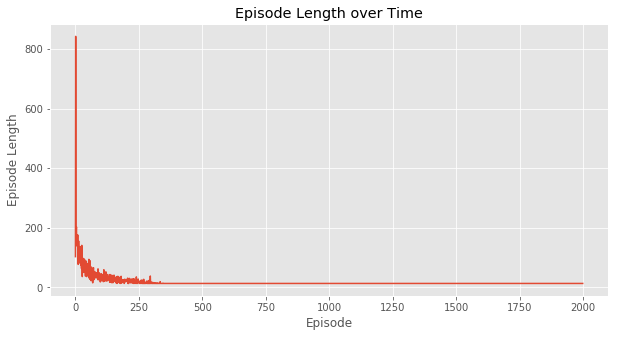

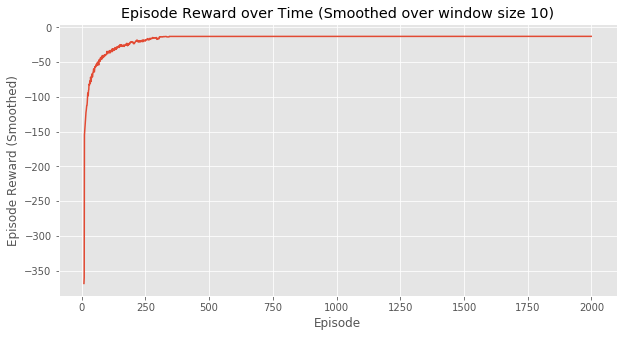

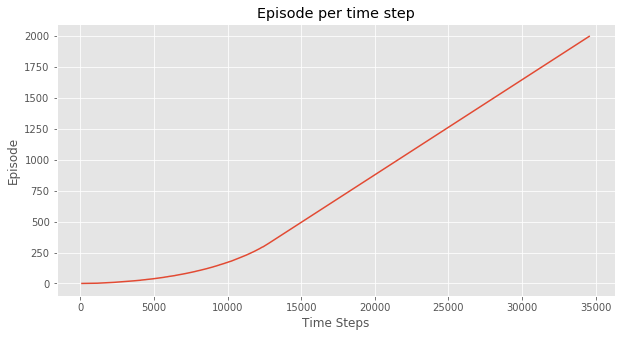

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [44]:
plotting.plot_episode_stats(stats)

In [45]:
#Q-learning algorithm will follow a risky path (more near from the cliff)
#End state has a default symbol of Up.
gridplotter(policy)

 36 is the Start State
↓  ↑  →  →  →  ↓  ↓  →  →  →  →  ↓  

→  ↑  ↓  →  →  →  →  ↓  ↓  →  →  ↓  

→  →  →  →  →  →  →  →  →  →  →  ↓  

↑  *  *  *  *  *  *  *  *  *  *  ↑  

In [55]:
Q_s, policy_s, stats_s = sarsa_control_epsilon_greedy(env, n_episodes=2000, epsilon= 0.1, discount_factor= 1.0, alpha=0.1)

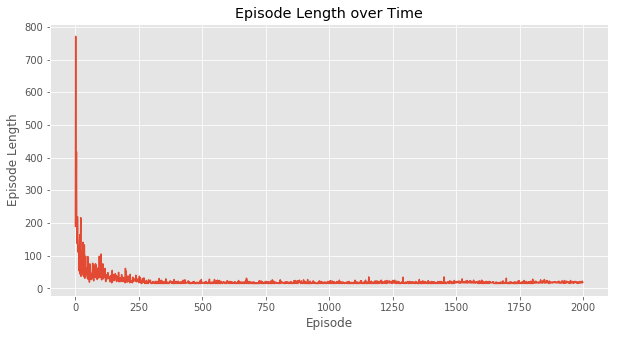

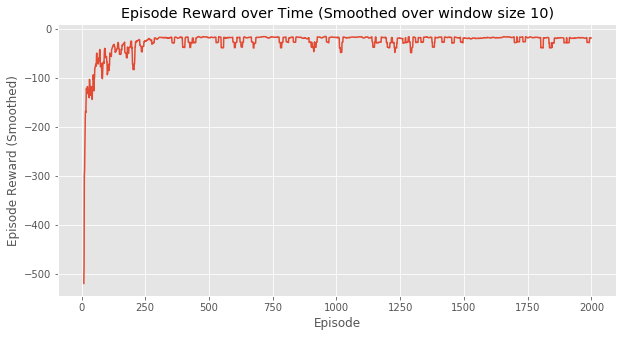

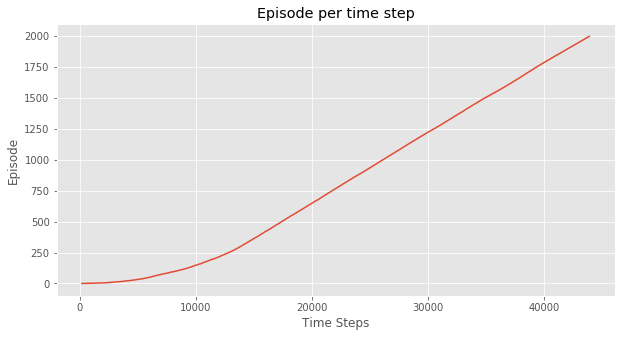

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [56]:
plotting.plot_episode_stats(stats_s)

In [57]:
#sarsa algorithm will follow a safer path (more far from the cliff)
#end state has a default symbol of Up.
gridplotter(policy_s)  

 36 is the Start State
→  →  →  →  →  →  →  →  →  →  →  ↓  

→  ↑  →  →  →  →  →  →  →  →  →  ↓  

↑  →  →  →  ↑  ↑  ↑  →  →  ↑  →  ↓  

↑  *  *  *  *  *  *  *  *  *  *  ↑  

# Important sources that could explain this stuff a lot better

1) Sutton-Barto cliffWalkingEnv example study.

2) David Silver Lectures and slides